<br>

# Project: WeRateDogs Analysis

<br>

## Data Wrangling

In [1]:
import pandas as pd
import numpy as np
import requests

In [2]:
# Read in twitter-archive-enhanced.csv

archive_df = pd.read_csv('twitter-archive-enhanced.csv')
tweet_list = [t for t in archive_df['tweet_id']]
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
# Download Image predictions file programmatically

image_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(image_url)
with open('image_predictions.tsv', 'w') as f:
    f.write(response.text)

In [4]:
image_pred = pd.read_csv('image_predictions.tsv', sep = '\t')
#tweet_list = [t for t in image_pred['tweet_id']]
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


> None of the column has null values

#### Write tweets json into tweet_json.txt

In [6]:
import tweepy
import json

# Set up API
consumer_key = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
consumer_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
access_token = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
access_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXX'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [7]:
# Read tweets in json format into a text file

i = 0
tweets_not_found = []
with open('tweet_json.txt', 'w') as f:
    for t in tweet_list:
        i += 1
        try:
            tweet = api.get_status(t, tweet_mode='extended', wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
            f.write(json.dumps(tweet._json))
            f.write('\n')
        except:
            print('not success, tweet_id - {}'.format(t))
            tweets_not_found.append(t)
            pass
        if i%100 == 0:
            print(i)

not success, tweet_id - 888202515573088257
not success, tweet_id - 873697596434513921
100
not success, tweet_id - 872668790621863937
not success, tweet_id - 872261713294495745
not success, tweet_id - 869988702071779329
not success, tweet_id - 866816280283807744
not success, tweet_id - 861769973181624320
not success, tweet_id - 856602993587888130
200
not success, tweet_id - 851953902622658560
not success, tweet_id - 845459076796616705
not success, tweet_id - 844704788403113984
not success, tweet_id - 842892208864923648
not success, tweet_id - 837366284874571778
not success, tweet_id - 837012587749474308
300
not success, tweet_id - 829374341691346946
not success, tweet_id - 827228250799742977
400
500
not success, tweet_id - 812747805718642688
not success, tweet_id - 802247111496568832
600
700
not success, tweet_id - 779123168116150273
not success, tweet_id - 775096608509886464
800
not success, tweet_id - 771004394259247104
not success, tweet_id - 770743923962707968
not success, tweet_id 

Rate limit reached. Sleeping for: 61


not success, tweet_id - 754011816964026368
1000
1100
1200
1300
1400
1500
1600
1700
not success, tweet_id - 680055455951884288
1800
1900
2000
2100
2200
not success, tweet_id - 668480044826800133
not success, tweet_id - 668466899341221888
not success, tweet_id - 668297328638447616
not success, tweet_id - 668291999406125056
not success, tweet_id - 668286279830867968
not success, tweet_id - 668274247790391296
not success, tweet_id - 668268907921326080
not success, tweet_id - 668256321989451776
not success, tweet_id - 668248472370458624
not success, tweet_id - 668237644992782336
not success, tweet_id - 668226093875376128
not success, tweet_id - 668221241640230912
not success, tweet_id - 668204964695683073
not success, tweet_id - 668190681446379520
not success, tweet_id - 668171859951755264
not success, tweet_id - 668154635664932864
not success, tweet_id - 668142349051129856
not success, tweet_id - 668113020489474048
not success, tweet_id - 667937095915278337
not success, tweet_id - 66792489

In [8]:
# Read tweets in json format from the text file 'tweet_json.txt'.

df_list = []
with open('tweet_json.txt', 'r') as file:
    for line in file:
        rec = json.loads(line)
        # Append to list of dictionaries
        df_list.append({'tweet_id': rec['id'],
                        'retweet_count': rec['retweet_count'],
                        'favorite_count': rec['favorite_count']})

count_df = pd.DataFrame(df_list)
print(count_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2229 entries, 0 to 2228
Data columns (total 3 columns):
tweet_id          2229 non-null int64
retweet_count     2229 non-null int64
favorite_count    2229 non-null int64
dtypes: int64(3)
memory usage: 52.4 KB
None


In [9]:
count_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7762,36497
1,892177421306343426,5753,31455
2,891815181378084864,3808,23699
3,891689557279858688,7922,39816
4,891327558926688256,8554,38019


In [10]:
count_df.describe()

,tweet_id,retweet_count,favorite_count
count,2.229000e+03,2229.000000,2229.000000
mean,7.453144e+17,2827.973082,7916.116644
std,6.784821e+16,4678.654041,11978.057666
min,6.660209e+17,1.000000,0.000000
25%,6.812615e+17,615.000000,1526.000000
50%,7.280353e+17,1372.000000,3516.000000
75%,8.011151e+17,3267.000000,9786.000000
max,8.924206e+17,78509.000000,157749.000000


In [11]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

> Some columns have null values like - 
- in_reply_to_status_id
- in_reply_to_user_id
- retweeted_status_id
- retweeted_status_user_id
- retweeted_status_timestamp
- expanded_urls

We will examine how we will deal with these columns and take action accordingly.

In [12]:
archive_df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [13]:
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [14]:
archive_df.query('rating_numerator > 20')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


In [15]:
archive_df.query('rating_denominator > 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [16]:
archive_df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [17]:
archive_df.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [18]:
archive_df.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [19]:
archive_df.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [20]:
archive_df.name.value_counts()

None       745
a           55
Charlie     12
Oliver      11
Lucy        11
          ... 
Juckson      1
Carll        1
Miguel       1
Shooter      1
Eazy         1
Name: name, Length: 957, dtype: int64

In [21]:
archive_df.query('name == "None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None


In [22]:
archive_df.query('name == "a"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593...,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715733265...,10,10,a,None,None,None,None
1340,704859558691414016,NaN,NaN,2016-03-02 02:43:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704859558...,10,10,a,None,None,pupper,None


In [23]:
archive_df.query('name == "this"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None


In [24]:
archive_df.query('name == "an"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
759,778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is an East African Chalupa...,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None
1025,746369468511756288,NaN,NaN,2016-06-24 15:48:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Iraqi Speed Kangaroo. It is not a d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746369468...,9,10,an,None,None,None,None
1362,703041949650034688,NaN,NaN,2016-02-26 02:20:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an East African Chalupa Seal. We only ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None
2204,668636665813057536,NaN,NaN,2015-11-23 03:46:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Irish Rigatoni terrier named Berta....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668636665...,10,10,an,None,None,None,None
2333,666337882303524864,NaN,NaN,2015-11-16 19:31:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an extremely rare horned Parthenon. No...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666337882...,9,10,an,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None


In [25]:
archive_df.query('in_reply_to_status_id == "NaN"').describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.278000e+03,0.0,0.0,1.810000e+02,1.810000e+02,2278.000000,2278.000000
mean,7.424486e+17,NaN,NaN,7.720400e+17,1.241698e+16,12.179104,10.413521
std,6.829145e+16,NaN,NaN,6.236928e+16,9.599254e+16,38.752738,6.376645
min,6.660209e+17,NaN,NaN,6.661041e+17,7.832140e+05,0.000000,2.000000
25%,6.783975e+17,NaN,NaN,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,NaN,NaN,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.986857e+17,NaN,NaN,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,NaN,NaN,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [26]:
archive_df.query('rating_numerator == 1776')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


> The record seems valid

In [27]:
archive_df.query('rating_numerator == 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [28]:
archive_df.query('rating_denominator == 170')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None


In [29]:
archive_df.query('rating_denominator < 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [30]:
image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [31]:
image_pred.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [32]:
archive_df.loc[archive_df['retweeted_status_id'].notnull()][['tweet_id', 'text']]

,tweet_id,text
19,888202515573088257,RT @dog_rates: This is Canela. She attempted s...
32,886054160059072513,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...
36,885311592912609280,RT @dog_rates: This is Lilly. She just paralle...
68,879130579576475649,RT @dog_rates: This is Emmy. She was adopted t...
73,878404777348136964,RT @dog_rates: Meet Shadow. In an attempt to r...
...,...,...
1023,746521445350707200,RT @dog_rates: This is Shaggy. He knows exactl...
1043,743835915802583040,RT @dog_rates: Extremely intelligent dog here....
1242,711998809858043904,RT @twitter: @dog_rates Awesome Tweet! 12/10. ...
2259,667550904950915073,RT @dogratingrating: Exceptional talent. Origi...


> Records where column 'retweeted_status_id' is not null, are all retweets.

## Assessing Data

### Quality Issues
#### Twitter Archive Table - `archive_df`
1. 'name' column has value 'None', 'a', 'an' and 'this'.
2. 'timestamp' is string datatype
3. Records where 'retweeted_status_id', 'retweeted_status_user_id' and 'retweeted_status_timestamp' is not null, are retweets. drop these rows
4. Afterwards, drop columns 'retweeted_status_id', 'retweeted_status_user_id' and 'retweeted_status_timestamp'
5. Rows where 'in_reply_to_status_id' and 'in_reply_to_user_id' is not null, have wrong numnerator and denominator for ratings. These are not original tweets but replies actually.
6. Afterwards, drop 'in_reply_to_status_id' and 'in_reply_to_user_id' columns
7. tweet_id = 666287406224695296 actual rating is 9/10
8. Rating parameters are not consistent. Add column with division result of Numerator and Denominator
9. Tweets for 13 dogs have multiple stages filled in. Some of them are correct. Some will need to be changed.

#### Image Predictions Table - `image_pred`
10. column 'img_num' is integer datatype - can be category


### Tidiness Issues
11. **`archive_df`** - 'doggo', 'floofer', 'pupper', 'puppo' - value 'None' should be replaced by NaN and these columns can be merged into one
12. **`archive_df`** and **`count_df`** should be merged as similar contents

## Clean Data

In [33]:
archive_clean = archive_df.copy()
image_pred_clean = image_pred.copy()
count_clean = count_df.copy()

### 1. `archive_df`: 'name' column has value `'None'`, `'a'`, `'an'` and `'this'`

_**Define**_

Replace value by 'NaN' where the column value is 'None', 'a', 'an' and 'this'.

---

_**Code**_

In [34]:
archive_clean.loc[((archive_clean['name']=='a') | (archive_clean['name']=='an') | (archive_clean['name']=='this')
                  | (archive_clean['name']=='None')), 'name'] = np.nan

_**Test**_

In [35]:
archive_clean.name.value_counts()

Charlie    12
Oliver     11
Lucy       11
Cooper     11
Tucker     10
           ..
Shawwn      1
Hector      1
Juckson     1
Carll       1
Eazy        1
Name: name, Length: 953, dtype: int64

In [36]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1548 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### 2. `archive_df`: 'timestamp' is string datatype

_**Define**_

Change datatype for the column to datetime.

---

_**Code**_

In [37]:
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

_**Test**_

In [38]:
archive_clean.timestamp

0      2017-08-01 16:23:56+00:00
1      2017-08-01 00:17:27+00:00
2      2017-07-31 00:18:03+00:00
3      2017-07-30 15:58:51+00:00
4      2017-07-29 16:00:24+00:00
                  ...           
2351   2015-11-16 00:24:50+00:00
2352   2015-11-16 00:04:52+00:00
2353   2015-11-15 23:21:54+00:00
2354   2015-11-15 23:05:30+00:00
2355   2015-11-15 22:32:08+00:00
Name: timestamp, Length: 2356, dtype: datetime64[ns, UTC]

In [39]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1548 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[

### 3. `archive_df`: Records where 'retweeted_status_id', 'retweeted_status_user_id' and 'retweeted_status_timestamp' is not null, are retweets. 

_**Define**_

Drop these rows from the table. Total of 181 records will be dropped. Number of remaining rows will be 2175.

---

_**Code**_

In [40]:
archive_clean = archive_clean.iloc[archive_clean.loc[archive_clean['retweeted_status_id'].isna()].index]

_**Test**_

In [41]:
archive_clean.loc[archive_clean['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [42]:
archive_clean.shape

(2175, 17)

### 4. `archive_df`: Drop the columns 'retweeted_status_id', 'retweeted_status_user_id' and 'retweeted_status_timestamp' 

_**Define**_

Drop these columns from the table.

---

_**Code**_

In [43]:
archive_clean.drop(columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)

_**Test**_

In [44]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns, UTC]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     1433 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: datetime64[ns, UTC](1), float64(2), int64(3), object(8)
memory usage: 254.9+ KB


### 5. `archive_df`: Rows where 'in_reply_to_status_id' and 'in_reply_to_user_id' is not null, have wrong numnerator/denominator ratings

_**Define**_

Drop rows where 'in_reply_to_status_id' and 'in_reply_to_user_id' is not null. 

---

_**Code**_

In [45]:
archive_clean = archive_clean[archive_clean.in_reply_to_status_id.isna()]

_**Test**_

In [46]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2097 non-null int64
in_reply_to_status_id    0 non-null float64
in_reply_to_user_id      0 non-null float64
timestamp                2097 non-null datetime64[ns, UTC]
source                   2097 non-null object
text                     2097 non-null object
expanded_urls            2094 non-null object
rating_numerator         2097 non-null int64
rating_denominator       2097 non-null int64
name                     1432 non-null object
doggo                    2097 non-null object
floofer                  2097 non-null object
pupper                   2097 non-null object
puppo                    2097 non-null object
dtypes: datetime64[ns, UTC](1), float64(2), int64(3), object(8)
memory usage: 245.7+ KB


### 6. `archive_df`: Drop 'in_reply_to_status_id' and 'in_reply_to_user_id' columns

_**Define**_

Drop the columns from the table

---

_**Code**_

In [47]:
archive_clean.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id'], inplace=True)

_**Test**_

In [48]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns, UTC]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1432 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns, UTC](1), int64(3), object(8)
memory usage: 213.0+ KB


In [49]:
archive_clean.rating_numerator.value_counts()

12      486
10      436
11      413
13      287
9       153
8        98
7        52
14       38
5        34
6        32
3        19
4        16
2         9
1         5
26        1
44        1
165       1
24        1
60        1
50        1
144       1
80        1
84        1
88        1
121       1
204       1
420       1
1776      1
27        1
45        1
75        1
99        1
0         1
Name: rating_numerator, dtype: int64

In [50]:
archive_clean.rating_denominator.value_counts()

10     2080
50        3
11        2
80        2
7         1
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64

### 7. `archive_df`: tweet_id = 666287406224695296 actual rating is 9/10

_**Define**_

Replace numerator rating by 9 and denominator rating by 10.

---

_**Code**_

In [51]:
archive_clean_copy = archive_clean.copy()

In [52]:
archive_clean.loc[(archive_clean['tweet_id'] == 666287406224695296), ['rating_numerator', 'rating_denominator']] = [9, 10]

_**Test**_

In [53]:
archive_clean.loc[archive_clean['tweet_id'] == 666287406224695296]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2335,666287406224695296,2015-11-16 16:11:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,9,10,NaN,None,None,None,None


 --- 

### 8. `archive_df`: Rating parameters are not consistent. Add column with division result of Numerator and Denominator

_**Define**_

Add a column `'rating'` where rating_numerator is divided by rating_denominator

---

_**Code**_

In [54]:
archive_clean['rating'] = archive_clean.rating_numerator / archive_clean.rating_denominator

_**Test**_

In [55]:
archive_clean['rating'].value_counts()

1.200000      490
1.000000      438
1.100000      418
1.300000      287
0.900000      154
0.800000       98
0.700000       51
1.400000       38
0.500000       34
0.600000       32
0.300000       19
0.400000       15
0.200000       10
0.100000        4
2.700000        1
3.428571        1
0.636364        1
177.600000      1
2.600000        1
42.000000       1
7.500000        1
0.000000        1
0.818182        1
Name: rating, dtype: int64

In [56]:
archive_clean.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
1734,679736210798047232,2015-12-23 18:51:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This pup's name is Sabertooth (parents must be...,https://twitter.com/dog_rates/status/679736210...,9,10,NaN,None,None,None,None,0.9
448,819006400881917954,2017-01-11 02:21:57+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sunny. She was also a very good First ...,https://twitter.com/dog_rates/status/819006400...,14,10,Sunny,doggo,None,None,None,1.4
2027,671874878652489728,2015-12-02 02:13:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Mia. She was specifically told not get...,https://twitter.com/dog_rates/status/671874878...,10,10,Mia,None,None,None,None,1.0


### 9. `image_pred`: column `'img_num'` is integer datatype - can be category

_**Define**_

Convert the column to category data type.

---

_**Code**_

In [57]:
image_pred_clean.img_num = image_pred_clean.img_num.astype('category')

_**Test**_

In [58]:
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null category
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), category(1), float64(3), int64(1), object(4)
memory usage: 138.1+ KB


In [59]:
image_pred_clean.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

### 10. `archive_df`: column 'doggo', 'floofer', 'pupper', 'puppo' -  have 'None' value. Can be replaced by NaN and these columns can be merged into one

_**Define**_

Replace 'None' in these columns by np.nan and merge the columns

---

_**Code**_

In [60]:
archive_clean.loc[(archive_clean['doggo']=='None'), 'doggo'] = np.nan
archive_clean.loc[(archive_clean['floofer']=='None'), 'floofer'] = np.nan
archive_clean.loc[(archive_clean['pupper']=='None'), 'pupper'] = np.nan
archive_clean.loc[(archive_clean['puppo']=='None'), 'puppo'] = np.nan
archive_clean['stage'] = archive_clean.iloc[:,8:12].fillna('').sum(1).replace('', np.nan)
archive_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

_**Test**_

In [61]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns, UTC]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1432 non-null object
rating                2097 non-null float64
stage                 336 non-null object
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(5)
memory usage: 180.2+ KB


In [62]:
archive_clean.stage.value_counts()

pupper          221
doggo            72
puppo            23
doggopupper       9
floofer           9
doggopuppo        1
doggofloofer      1
Name: stage, dtype: int64

In [63]:
archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'rating', 'stage'],
      dtype='object')

### 11. `archive_df` - Column 'stage' has values 'doggopupper', 'doggofloofer' and 'doggopuppo' i.e. some tweets contain multiple stages.

_**Define**_

For the rows where stage value is 'doggopupper', 'doggofloofer' or 'doggopuppo', change to correct value

---

_**Assess**_

In [64]:
archive_clean.loc[(archive_clean['stage'] == 'doggopupper') | 
                 (archive_clean['stage'] == 'doggofloofer') |
                 (archive_clean['stage'] == 'doggopuppo')][['tweet_id', 'text', 'stage']]

,tweet_id,text,stage
191,855851453814013952,Here's a puppo participating in the #ScienceMa...,doggopuppo
200,854010172552949760,"At first I thought this was a shy doggo, but i...",doggofloofer
460,817777686764523521,"This is Dido. She's playing the lead role in ""...",doggopupper
531,808106460588765185,Here we have Burke (pupper) and Dexter (doggo)...,doggopupper
575,801115127852503040,This is Bones. He's being haunted by another d...,doggopupper
705,785639753186217984,This is Pinot. He's a sophisticated doggo. You...,doggopupper
733,781308096455073793,"Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",doggopupper
889,759793422261743616,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",doggopupper
956,751583847268179968,Please stop sending it pictures that don't eve...,doggopupper
1063,741067306818797568,This is just downright precious af. 12/10 for ...,doggopupper


#### Cross-validating against actual tweets

index |tweet_id |	stage | actual value |
------|---------|--------|--------------|    
191	| 855851453814013952	| doggopuppo | puppo
200	| 854010172552949760	| doggofloofer | floofer
460	| 817777686764523521	| doggopupper | pupper
531	| 808106460588765185	| doggopupper | -correct-
575	| 801115127852503040	| doggopupper | pupper
705	| 785639753186217984	| doggopupper | doggo
733	| 781308096455073793	| doggopupper | -correct-
889	| 759793422261743616	| doggopupper | -correct-
956	| 751583847268179968	| doggopupper | np.nan
1063| 741067306818797568	| doggopupper | -correct-
1113| 733109485275860992	| doggopupper | -correct-


_**Code**_

In [65]:
archive_clean.loc[archive_clean['tweet_id'] == 855851453814013952, 'stage'] = 'puppo'
archive_clean.loc[archive_clean['tweet_id'] == 854010172552949760, 'stage'] = 'floofer'
archive_clean.loc[archive_clean['tweet_id'] == 817777686764523521, 'stage'] = 'pupper'
archive_clean.loc[archive_clean['tweet_id'] == 801115127852503040, 'stage'] = 'pupper'
archive_clean.loc[archive_clean['tweet_id'] == 785639753186217984, 'stage'] = 'doggo'
archive_clean.loc[archive_clean['tweet_id'] == 751583847268179968, 'stage'] = np.nan

_**Code**_

In [66]:
archive_clean.stage.value_counts()

pupper         223
doggo           73
puppo           24
floofer         10
doggopupper      5
Name: stage, dtype: int64

### 12. `archive_df` and `count_df` should be merged as similar contents

_**Define**_

Merge the two tables on column 'tweet_id'

---

_**Code**_

In [67]:
archive_clean = pd.merge(archive_clean, count_clean, on=['tweet_id'], how='left')

_**Test**_

In [68]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns, UTC]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  1432 non-null object
rating                2097 non-null float64
stage                 335 non-null object
retweet_count         1991 non-null float64
favorite_count        1991 non-null float64
dtypes: datetime64[ns, UTC](1), float64(3), int64(3), object(5)
memory usage: 213.0+ KB


In [69]:
archive_clean.sample(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,stage,retweet_count,favorite_count
677,761004547850530816,2016-08-04 01:03:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo and Ty. Bo eats paper and Ty felt l...,https://twitter.com/dog_rates/status/761004547...,11,10,Bo,1.1,NaN,3532.0,11516.0


### Backup cleaned dataframes in csv files

- archive_clean - archive_clean.csv
- image_pred_clean - image_pred_clean.csv

In [95]:
archive_clean.to_csv('twitter_archive_master.csv', index=False)
image_pred_clean.to_csv('image_pred_master.csv', index=False)

## Data Analysis

---
Import matolotlib and let's make a copy of cleaned dataframes.

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

tweet_df = archive_clean.copy()
predict_df = image_pred_clean.copy()
tweet_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'rating', 'stage',
       'retweet_count', 'favorite_count'],
      dtype='object')

We won't be using most of the columns from tweet_df. Hence, we will drop out the columns that are not required.

In [72]:
tweet_df = tweet_df[['tweet_id', 'rating', 'stage', 'retweet_count', 'favorite_count']]
tweet_df.sample(2)

,tweet_id,rating,stage,retweet_count,favorite_count
37,884441805382717440,1.4,NaN,5231.0,25577.0
55,880465832366813184,1.2,NaN,5737.0,26948.0


In [73]:
tweet_df.rating.value_counts()

1.200000      490
1.000000      438
1.100000      418
1.300000      287
0.900000      154
0.800000       98
0.700000       51
1.400000       38
0.500000       34
0.600000       32
0.300000       19
0.400000       15
0.200000       10
0.100000        4
2.700000        1
3.428571        1
0.636364        1
177.600000      1
2.600000        1
42.000000       1
7.500000        1
0.000000        1
0.818182        1
Name: rating, dtype: int64

Let's create bins for the rating column so that our further analysis is facilitated. Since there are only 6 records with a rating of more than 1.4, we will put them all in single bin.

In [74]:
# Take a bin size of 0.2. 

rating_bin = [0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 200]

tweet_df['rating_grp'] = pd.cut(tweet_df['rating'], bins=rating_bin)
tweet_df.sample(5)

,tweet_id,rating,stage,retweet_count,favorite_count,rating_grp
1669,674269164442398721,0.8,NaN,223.0,890.0,"(0.6, 0.8]"
535,785872687017132033,1.2,NaN,1873.0,6874.0,"(1.0, 1.2]"
2083,666082916733198337,0.6,NaN,42.0,104.0,"(0.4, 0.6]"
1629,675145476954566656,0.9,NaN,882.0,2094.0,"(0.8, 1.0]"
749,751538714308972544,1.0,NaN,1281.0,5103.0,"(0.8, 1.0]"


In [75]:
# Get the number of records for each rating group

tweet_df.rating_grp.value_counts()

(1.0, 1.2]      908
(0.8, 1.0]      593
(1.2, 1.4]      325
(0.6, 0.8]      150
(0.4, 0.6]       66
(0.2, 0.4]       34
(0.0, 0.2]       14
(1.4, 200.0]      6
Name: rating_grp, dtype: int64

In [76]:
tweet_df.query('0.8 < rating <= 1.4').shape[0]/tweet_df.shape[0]

0.8707677634716261

In [77]:
tweet_df.query('0.8 < rating <= 1.2').shape[0]/tweet_df.shape[0]

0.7157844539818788

> <font color = '#1d8237'>**As we can see through the distribution of ratings:**
- 87.08% of tweets have ratings in range (0.8 - 1.4].
- 71.58% of tweets have ratings in range (0.8 - 1.2]. </font>

Let's check the average retweet count for each rating group.

In [78]:
tweet_df.groupby(['rating_grp']).mean()['retweet_count']

rating_grp
(0.0, 0.2]      2033.500000
(0.2, 0.4]       956.896552
(0.4, 0.6]      1110.475410
(0.6, 0.8]      1064.526718
(0.8, 1.0]      1255.734918
(1.0, 1.2]      2474.111738
(1.2, 1.4]      6581.190625
(1.4, 200.0]    3464.333333
Name: retweet_count, dtype: float64

> <font color = '#1d8237'> **Most of the retweets are done for the posts which receive a rating in range (1.2 - 1.4]** </font>

---

Let's check the average favourite count for each rating group.

In [79]:
tweet_df.groupby(['rating_grp']).mean()['favorite_count']

rating_grp
(0.0, 0.2]       4170.200000
(0.2, 0.4]       2579.862069
(0.4, 0.6]       3282.000000
(0.6, 0.8]       2979.763359
(0.8, 1.0]       3641.954296
(1.0, 1.2]       8631.830700
(1.2, 1.4]      21991.662500
(1.4, 200.0]    10298.500000
Name: favorite_count, dtype: float64

> <font color = '#1d8237'> **Once again, tweets that receive a rating in range (1.2 - 1.4], are favorited the most.** </font>

---

Let's check the probability that the neural network predicted the dog in the image. <for p1> 

In [80]:
predict_df.groupby('p1_dog').size()[1]/predict_df.shape[0]

0.7383132530120482

In [81]:
predict_df.groupby('p1_dog').mean()['p1_conf']

p1_dog
False    0.540167
True     0.613823
Name: p1_conf, dtype: float64

> <font color = '#1d8237'> **The neural network predicts the dog in the image, 73.8% of the times for p1. 
    Also, the probability of correctly identifying dog's breed given they are predicted as dog as per p1, is 0.614** </font>

---

Let's check for p2 and p3

In [82]:
predict_df.groupby('p2_dog').mean()['p2_conf'][1]

0.14047046010064407

In [83]:
predict_df.groupby('p3_dog').mean()['p3_conf'][1]

0.061642443506691035

> <font color = '#1d8237'> 
- The probability of correctly idenfying dog's breed given they are predicted as dog as per p2, is 0.140
- The probability of correctly idenfying dog's breed given they are predicted as dog as per p2, is 0.062
    
> <font color = '#1d8237'> **The decline in probability of correctly identifying the dog's breed in p1, p2 and p3 is quite clearly evident.**
</font>

### Plot Visualization

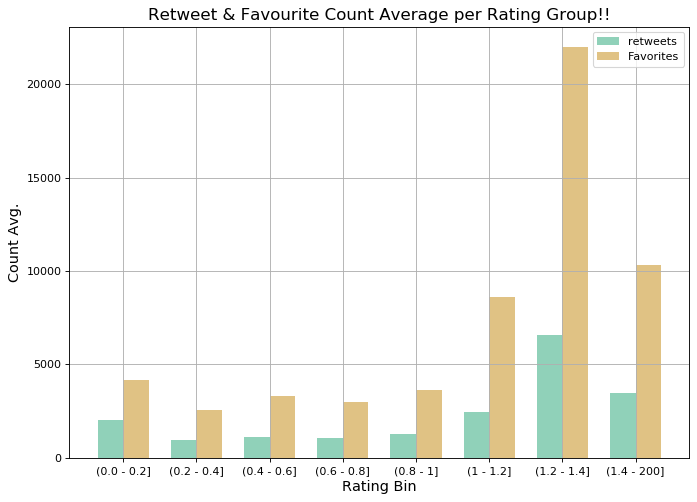

In [93]:
# Plot the graph

# Get average of retweet counts for each rating group
retweet_avg = tweet_df.groupby(['rating_grp']).mean()['retweet_count']

# Get average of favourite counts for each rating group
fav_avg = tweet_df.groupby(['rating_grp']).mean()['favorite_count']

# Draw bar graph
plt.style.use('default')
plt.figure(figsize=(10,7), dpi=80)
ind = np.arange(8)  # the x locations for the groups
width = 0.35

# plot bars
bars_0 = plt.bar(ind, retweet_avg, width, color = '#90d1b9', label = 'retweets')
bars_1 = plt.bar(ind+width, fav_avg, width, color = '#e0c284', label = 'Favorites')

# title and labels
plt.title('Retweet & Favourite Count Average per Rating Group!!', fontdict = {'fontsize':'15'})
locations = ind + width / 2  # xtick locations
labels = ['(0.0 - 0.2]', '(0.2 - 0.4]', '(0.4 - 0.6]', '(0.6 - 0.8]', '(0.8 - 1]', '(1 - 1.2]', '(1.2 - 1.4]', '(1.4 - 200]']  # xtick labels
plt.xticks(locations, labels)
plt.xlabel('Rating Bin', fontdict = {'fontsize':'13'})
plt.ylabel('Count Avg.', fontdict = {'fontsize':'13'})
plt.legend()
plt.grid()
plt.savefig('counts_bar.png', dpi = 80, bbox_inches='tight')
plt.show()

<font color = '#1d8237'> **The same observation that we noticed statistically has been plotted here. As can be seen the posts that received most retweets and favorties got the rating in range (1.2 - 1.4]**

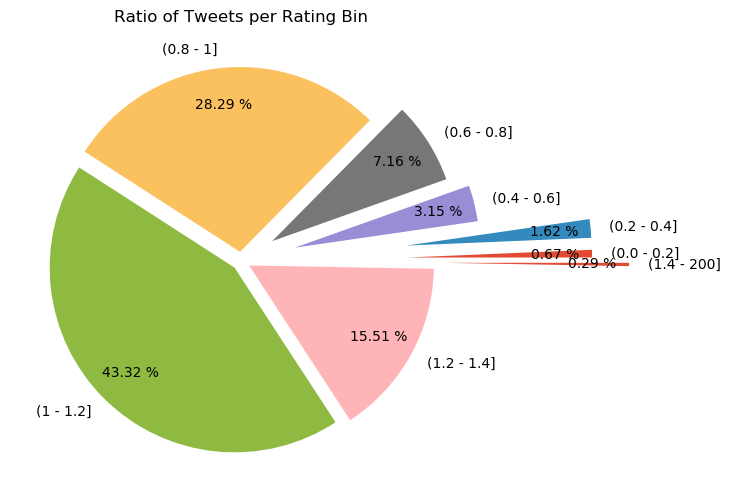

In [94]:
# Plot the graph

x = tweet_df.groupby('rating_grp').size()
counts = [i for i in x]

plt.style.use('ggplot')
plt.figure(figsize=(8,6), dpi = 100)

labels = ['(0.0 - 0.2]', '(0.2 - 0.4]', '(0.4 - 0.6]', '(0.6 - 0.8]', '(0.8 - 1]', '(1 - 1.2]', '(1.2 - 1.4]', '(1.4 - 200]']
explode = [.9, .9, .3, 0.2, .05, .05, .05, 1.1]

plt.pie(counts, labels = labels, autopct='%.2f %%', pctdistance = 0.8, explode = explode)

plt.title('Ratio of Tweets per Rating Bin', fontdict = {'fontsize':'12'})
plt.savefig('tweet_ratio.png', dpi = 105, bbox_inches='tight')
plt.show()

<font color = '#1d8237'> **Around 87% of the tweets get a rating in range (0.8 - 1.4]. The above plot shows the same distribution that analyzed statistically.**